## Data analysis, processing, and visualization

#### 1. Read the data
First, we read and explore the datasets that were used for classifier trainings in the manuscript: the original (without noise), training, and test (with noise) datasets. 

In [1]:
data_filename_train = "data/all_gene_annotations.added_incompleteness_and_contamination.training.tsv"
data_filename_test = "data/all_gene_annotations.added_incompleteness_and_contamination.testing.tsv"
data_filename_orig = "data/all_gene_annotations.tsv"
y_filename = "data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.csv"

In [2]:
from utils import read_xy_data

# Train dataset
d3_train, X_train, y_train = read_xy_data(data_filename_train, y_filename)
num_aerobs_train = y_train['oxytolerance'].sum()
num_anaerobs_train = len(y_train['oxytolerance']) - num_aerobs_train

print(f"Total number of genomes for training = {num_aerobs_train+num_anaerobs_train}")
print(f"Percentage of aerobs in train dataset {round(num_aerobs_train/(num_aerobs_train + num_anaerobs_train), 2)}")

y name = data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.csv
Counts of each class in training/test data: shape: (2, 2)
┌──────────────┬───────┐
│ oxytolerance ┆ len   │
│ ---          ┆ ---   │
│ str          ┆ u32   │
╞══════════════╪═══════╡
│ aerobe       ┆ 58356 │
│ anaerobe     ┆ 29808 │
└──────────────┴───────┘
Total number of genomes for training = 88164
Percentage of aerobs in train dataset 0.66


In [3]:
# Test dataset
d3_test, X_test, y_test = read_xy_data(data_filename_test, y_filename)
num_aerobs_test = y_test['oxytolerance'].sum()
num_anaerobs_test = len(y_test['oxytolerance']) - num_aerobs_test

print(f"Total number of genomes for testing = {num_aerobs_test+num_anaerobs_test}")
print(f"Percentage of aerobs in test dataset {round(num_aerobs_test/(num_aerobs_test + num_anaerobs_test), 2)}")

y name = data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.csv
Counts of each class in training/test data: shape: (2, 2)
┌──────────────┬───────┐
│ oxytolerance ┆ len   │
│ ---          ┆ ---   │
│ str          ┆ u32   │
╞══════════════╪═══════╡
│ anaerobe     ┆ 8172  │
│ aerobe       ┆ 17460 │
└──────────────┴───────┘
Total number of genomes for testing = 25632
Percentage of aerobs in test dataset 0.68


In [4]:
# Original dataset

d3_orig, X_orig, y_orig = read_xy_data(data_filename_orig, y_filename)
num_aerobs_orig = y_test['oxytolerance'].sum()
num_anaerobs_orig = len(y_test['oxytolerance']) - num_aerobs_orig

print(f"Total number of genomes for testing = {num_aerobs_orig+num_anaerobs_orig}")
print(f"Percentage of aerobs in test dataset {round(num_aerobs_orig/(num_aerobs_orig + num_anaerobs_orig), 2)}")

y name = data/bacdive_scrape_20230315.json.parsed.anaerobe_vs_aerobe.with_cyanos.csv
Counts of each class in training/test data: shape: (2, 2)
┌──────────────┬──────┐
│ oxytolerance ┆ len  │
│ ---          ┆ ---  │
│ str          ┆ u32  │
╞══════════════╪══════╡
│ anaerobe     ┆ 1055 │
│ aerobe       ┆ 2106 │
└──────────────┴──────┘
Total number of genomes for testing = 25632
Percentage of aerobs in test dataset 0.68


#### 2. Data sub-sampling
Due to the data imbalance (both the training and test datasets have more aerobs than anaerobs), we perform data sub-sampling, i.e. we randomly subsample aerobs, so their totatl number = the total number of anaerobs. 

In [6]:
import random 
from utils import table_row_subsampling

random.seed(42)

In [7]:
X_subsampled_train, y_subsampled_train = table_row_subsampling(d3_train)

Sub-sampling 58356 aerobs to 29808 anaerobs
Sub-sampled table length = 59616 with 29808 aerobs and  29808 anaerobs


In [8]:
X_subsampled_test, y_subsampled_test = table_row_subsampling(d3_test)

Sub-sampling 17460 aerobs to 8172 anaerobs
Sub-sampled table length = 16344 with 8172 aerobs and  8172 anaerobs


In [9]:
X_subsampled_orig, y_subsampled_orig = table_row_subsampling(d3_orig) 

Sub-sampling 2106 aerobs to 1055 anaerobs
Sub-sampled table length = 2110 with 1055 aerobs and  1055 anaerobs


The sub-sampled datasets are saved to the corresponding files, so they can be used for model training, if needed.

In [10]:
import pandas as pd

df_train = pd.DataFrame(X_subsampled_train)
filename = 'data/all_gene_annotations.added_incompleteness_and_contamination.subsampled.training.tsv'
df_train.to_csv(filename, sep="\t", index=False)

df_test = pd.DataFrame(X_subsampled_test)
filename = 'data/all_gene_annotations.added_incompleteness_and_contamination.subsampled.testing.tsv'
df_test.to_csv(filename, sep="\t", index=False)


df_orig = pd.DataFrame(X_subsampled_orig)
filename = 'data/all_gene_annotations.subsampled.tsv'
df_orig.to_csv(filename, sep="\t", index=False)

#### 3. PCA for data visualization


Use PCA to reduce the data dimensionality and visualize it.

Data after PCA reduction: (2110, 20)
Explained variance ratio: [0.11218065 0.06286769 0.05417358 0.04568379 0.03426689 0.02679777
 0.0213585  0.01846339 0.01652377 0.01562154 0.01112686 0.01092909
 0.00937024 0.00862675 0.00797272 0.00706832 0.0064005  0.00626484
 0.00614861 0.00563856]
Total explained variance: 0.4874840793571086


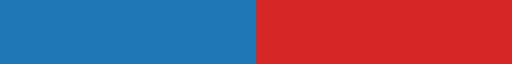

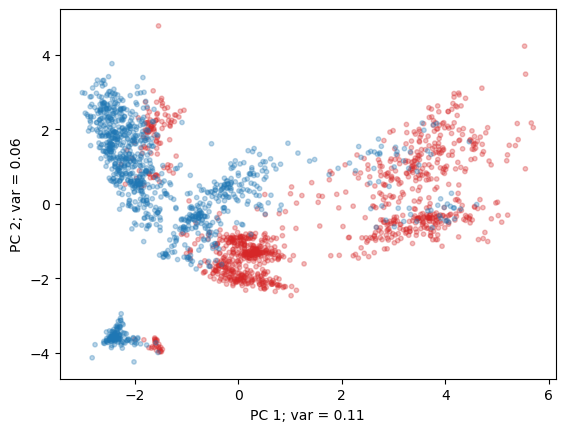

In [44]:
from utils import pca_run_and_plot
from matplotlib.colors import ListedColormap


# Create datasets with values only
X_val = X_subsampled_orig.drop(['accession','phylum','class','order','family','genus'], axis = 1)#'false_negative_rate',	'false_positive_rate'], axis = 1).values#X_subsampled_train_val#.values
y_val = y_subsampled_orig.values

n_compon = 20
colors = ListedColormap(["tab:blue", "tab:red"])
pca_run_and_plot(X_val, y_val, n_compon, colors)


PCA doesn't explain the complexity of the data well: the first two components explain ~20% of the variance in total only. Moreover, the separation between aerobs and anaerobs is not clean. This indicates that the data has a more complex non-linear structure, or the noise is dominating. Also, it might indicate that the number of features in the 2D linear PCA space isn't enough, i.e. the dependence between the data and the oxyadaptation feature might still be relatively simple and linear but in a higher-dimensional space (since the LogisticRegression performs well on this data). 

We can also color the samples in the PCA space with respect to their belonging to a class/family/genus etc. This is a useful thing to do to make sure that we have a category separation that has a different "resolution" comapring to aerobs/anaerobs.

In [55]:
category_id_train = pd.factorize(df_train['class'])[0]
category_id_test = pd.factorize(df_test['class'])[0]
category_id_orig = pd.factorize(df_orig['class'])[0]

Data after PCA reduction: (2110, 20)
Explained variance ratio: [0.11218065 0.06286769 0.05417358 0.04568379 0.03426689 0.02679777
 0.0213585  0.01846339 0.01652377 0.01562154 0.01112686 0.01092909
 0.00937024 0.00862675 0.0079727  0.00706872 0.00640164 0.00626473
 0.00615131 0.00564019]
Total explained variance: 0.4874898192686683


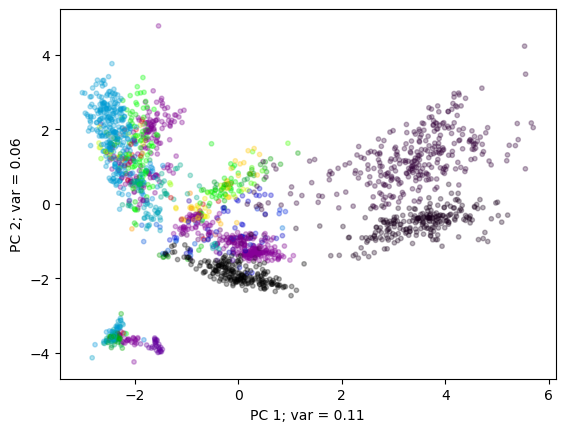

In [56]:
n_compon = 20
listed_cmap = pca_run_and_plot(X_val, category_id_orig, n_compon, 'nipy_spectral') 


#### 4. tSNE for data visualization


Next, we try tSNE which is a non-linear method for data dimensionality reduction and visualization. 

In [57]:
# Prepare the dataset
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

# Fit and transform the data
X_val = scaler.fit_transform(X_val)

In [58]:
from sklearn.manifold import TSNE

# Initialize and apply t-SNE
tsne = TSNE(n_components=2, perplexity=50, learning_rate=100, max_iter=3000, init='pca') 
X_tsne = tsne.fit_transform(X_val) 

print(X_tsne.shape)

(2110, 2)


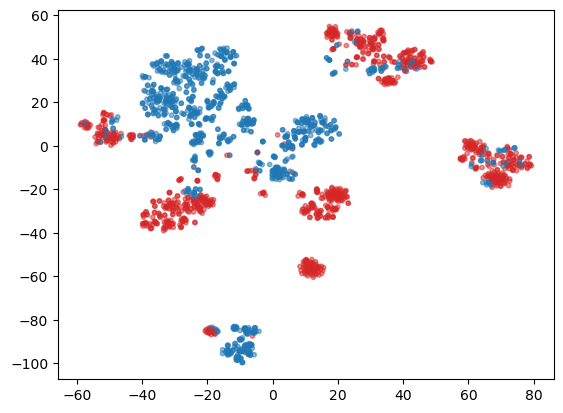

In [59]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
colors = ListedColormap(["tab:blue", "tab:red"])

# Visualize the t-SNE output
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_val, alpha=0.5, s = 10, cmap=colors)

At the same time, the tSNE space provides more insights about the local structure of the data. Here, we can see multiple sub-clusters with aerobs and anaerobs. 

Similarly, we color the samples in the tSNE space with respect to their belonging to a class.

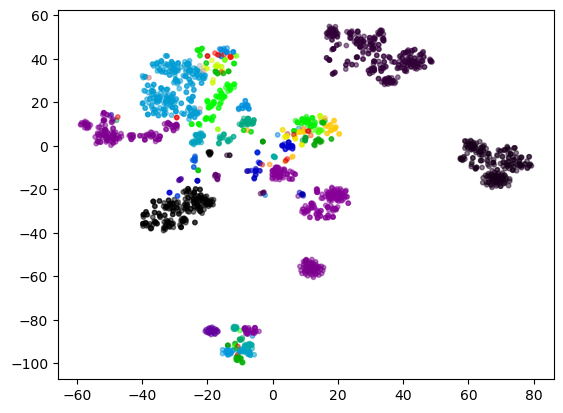

In [61]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=category_id_orig, alpha=0.5, s = 10, cmap=listed_cmap)

Based on the visualization, the tSNE sub-clusters might correspond to the sample classes (or some other more fine hierarcical organization).

The rest is still in the progress.....

In [50]:
X_subsampled_test_val = X_subsampled_test.drop(['accession','false_negative_rate',	'false_positive_rate'], axis = 1).values

X_subsampled_test_val_scaled = []
for row in X_subsampled_test_val:
    row_sm = float(sum(row))
    X_subsampled_test_val_scaled.append([float(row_i)/row_sm for row_i in row])


TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [9]:
print(X_subsampled_test_val)
X_subsampled_train_val = X_subsampled_train.drop(['accession','false_negative_rate',	'false_positive_rate'], axis = 1).values


X_subsampled_train_val_scaled = []
for row in X_subsampled_train_val:
    row_sm = float(sum(row))
    X_subsampled_train_val_scaled.append([float(row_i)/row_sm for row_i in row])

X_subsampled_train_val_scaled = np.array(X_subsampled_train_val_scaled)
    

[[1 2 0 ... 0 0 0]
 [1 4 4 ... 1 2 0]
 [0 1 1 ... 0 0 0]
 ...
 [2 1 0 ... 0 1 0]
 [1 1 0 ... 2 0 0]
 [0 0 1 ... 1 2 0]]


NameError: name 'np' is not defined

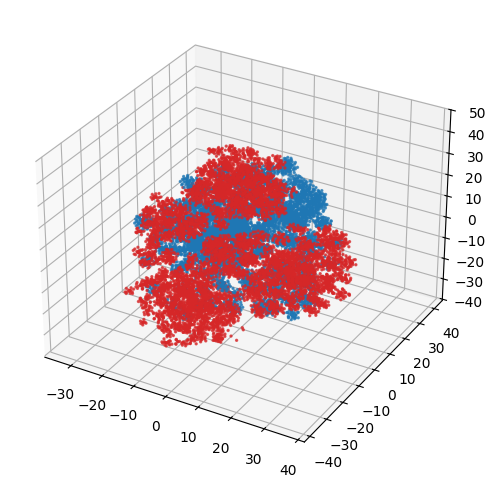

In [45]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: x, y, z coordinates with color based on labels
sc = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=y_test_val, alpha=0.7, s = 2, cmap=colors)


In [10]:
#print(X_subsampled_train)
import numpy as np

def remove_low_var_cogs(X):
 #   print(X)
    var_arr = []
    names= []
    for column in X.columns:
        if "COG" in column:
            names.append(column)
            column_array = X[column].values
            var_arr.append(np.var(column_array))
    
    var_thresh = 3
    ind_filter_var = [i for i in range(len(var_arr)) if var_arr[i] > var_thresh]
    print(len(var_arr))
    print(len(ind_filter_var))
    
    #df_subsampled = df.iloc[:, columns_to_subsample]
    names_filt = [names[i] for i in ind_filter_var ]
    
  #  table_indices = [ind+3 for ind in ind_filter_var]

  #  print(table_indices[-1])
   # print( X.iloc[:, table_indices[-1]])
    # table_indices = [0, 1, 2] + table_indices
    
    # X_subsampled_train
    
    X_reduc_dimens = X.iloc[:, ind_filter_var]#table_indices]
    return X_reduc_dimens

In [11]:
print(f"Before dim. reduction {X_test.shape}")

X_test_reduc_dimens = remove_low_var_cogs(X_test)

print(f"After dim. reduction {X_test_reduc_dimens.shape}")

Before dim. reduction (25632, 2677)
2677
56
After dim. reduction (25632, 56)
